<h1 align = 'center'>Predictive Modeling for Customer Churn</h1>
<br>
<h3 align = 'center'>Author - Naman Talwar</h3>
<br>

<h4>Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h5>Loading Data

In [2]:
data = pd.read_csv("bank.csv")
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


Cleaning and separating the data into columns

In [3]:
data = pd.read_csv("bank.csv", encoding='utf-8', delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

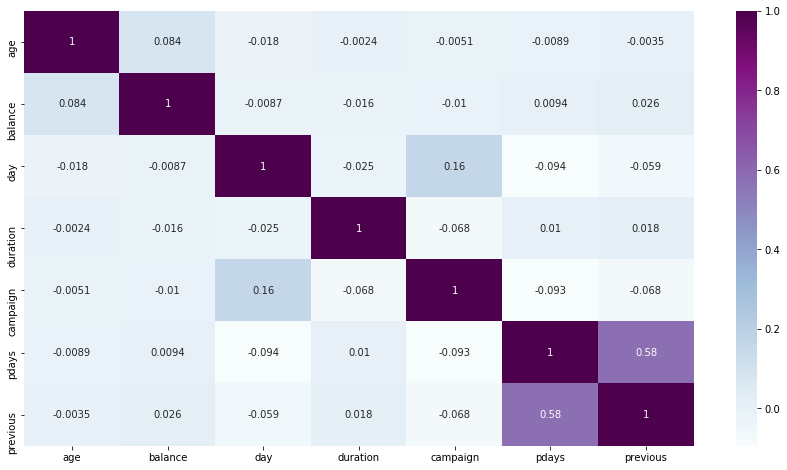

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),cmap = "BuPu",annot = True)
plt.show()

<h5>Mapping</h5>
Mapping the data to convert parameters that are string to numeric so that they can be used in the classification models 

In [10]:
mapping = {}
cols = data.drop('y', axis=1).columns
for col in cols:
  mapping[col] = {name: i for i, name in enumerate(data[col].unique())}
def mapping_func(row):
  return pd.Series([mapping[col][row[col]] for col in cols])

In [11]:
X = data.apply(mapping_func, axis=1)

In [12]:
y = data['y']

<br>
Dividing data into Test and Train data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=1,test_size = 0.3) 

In [14]:
print('x_train : ',len(X_train))
print('x_test : ',len(X_test))
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

x_train :  3164
x_test :  1357
y_train :  3164
y_test :  1357


<h5>Model 1 : Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report:
               precision    recall  f1-score   support

          no       0.88      0.99      0.93      1182
         yes       0.57      0.13      0.21       175

    accuracy                           0.88      1357
   macro avg       0.73      0.56      0.57      1357
weighted avg       0.84      0.88      0.84      1357

Confusion Matrix:
 [[1165   17]
 [ 152   23]]
Training Score:
 100.0


0.8754605747973471

<h5>Model 2 : K Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [18]:
y_pred=classifier.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
accuracy_score(y_test,y_pred)

Classification Report:
               precision    recall  f1-score   support

          no       0.87      0.99      0.93      1182
         yes       0.29      0.04      0.07       175

    accuracy                           0.86      1357
   macro avg       0.58      0.51      0.50      1357
weighted avg       0.80      0.86      0.82      1357

Confusion Matrix:
 [[1165   17]
 [ 168    7]]
Training Score:
 100.0


0.8636698599852616

<h5>Model 3 : Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
predict=model.predict(X_test)
print("The Predicted Values on the Test Data",predict)

The Predicted Values on the Test Data ['no' 'no' 'no' ... 'no' 'no' 'no']


In [22]:
print("Classification Report:\n",classification_report(y_test,predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,predict))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
accuracy_score(y_test,predict)

Classification Report:
               precision    recall  f1-score   support

          no       0.88      0.99      0.93      1182
         yes       0.36      0.05      0.09       175

    accuracy                           0.87      1357
   macro avg       0.62      0.52      0.51      1357
weighted avg       0.81      0.87      0.82      1357

Confusion Matrix:
 [[1166   16]
 [ 166    9]]
Training Score:
 100.0


0.8658806190125277

<h5>Model 4 : Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier=DecisionTreeClassifier(random_state=20)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

In [24]:
y_pred=classifier.predict(X_test)

In [25]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[1088   94]
 [ 120   55]]


In [26]:
accuracy_score=accuracy_score(y_test,y_pred)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score)

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.92      0.91      1182
         yes       0.37      0.31      0.34       175

    accuracy                           0.84      1357
   macro avg       0.63      0.62      0.62      1357
weighted avg       0.83      0.84      0.84      1357

Accuracy Score:
 0.8422991893883567


As we can see, almost all the models have similar accuracy.
Since Random Forest Classifier is the most accurate, I will be using it.

Feature Importance in the Random Forest Classifier Model

Feature: 0, Score: 0.11104
Feature: 1, Score: 0.06766
Feature: 2, Score: 0.03082
Feature: 3, Score: 0.03226
Feature: 4, Score: 0.00334
Feature: 5, Score: 0.12269
Feature: 6, Score: 0.02185
Feature: 7, Score: 0.00955
Feature: 8, Score: 0.02109
Feature: 9, Score: 0.10175
Feature: 10, Score: 0.09119
Feature: 11, Score: 0.19536
Feature: 12, Score: 0.04678
Feature: 13, Score: 0.04762
Feature: 14, Score: 0.02471
Feature: 15, Score: 0.07227


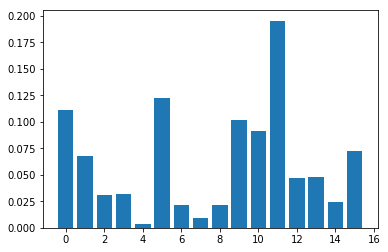

In [28]:
importance = rfc.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

As we can see the 11th feature is the most important feature which is the Last Contact Duration as said in the problem itself

<br>
<h4>Hyperparameter Tuning

In [29]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 12],
    'max_leaf_nodes': [3, 6, 9, 12],
}

I will be using GridSearchCV to tune the model further

In [30]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}


In [36]:
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features=None,
                                    max_leaf_nodes=9,
                                    n_estimators=100)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.98      0.93      1182
         yes       0.57      0.14      0.22       175

    accuracy                           0.88      1357
   macro avg       0.73      0.56      0.58      1357
weighted avg       0.84      0.88      0.84      1357



<h3>Saving the Model</h3>
I will be using pickle to save the model

In [37]:
import pickle 
file = open('assignmentuniacco.pk1','wb')
pickle.dump(model_grid,file)

In [38]:
#Loading the saved model to check
model = open('assignmentuniacco.pk1','rb')
forest = pickle.load(model)

In [39]:
y_prediction = forest.predict(X_test)

In [40]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

          no       0.89      0.98      0.93      1182
         yes       0.57      0.14      0.22       175

    accuracy                           0.88      1357
   macro avg       0.73      0.56      0.58      1357
weighted avg       0.84      0.88      0.84      1357

